---
<h1><center>IDS 435 - Assignment 1</center></h1>
<h4><center>Prof. Selva Nadarajah</center></h4> 
<h5><center>Spring 2023</center></h5> 

---


<!-------------------------------->
<!--  DO NOT CHANGE STYLE BELOW -->
<style>
blockquote{background:#FFECB3 !important; color:black !important; padding:20pt !important}
</style>
<!--  DO NOT CHANGE STYLE ABOVE -->
<!-------------------------------->

> **How to submit your assignment?**
> - Open the solution template available on the Blackboard, called ```IDS435_solution_ template.ipynb```. This template is a Jupyter Notebook file that allows you to easily combine text, math formula, pictures, tables, and python codes to write a proper report. I recommend you to open this file using [Visual Studio Code](https://code.visualstudio.com/) software.<br></br>
> - Use the template file to write your answers to the questions of this assignment.<br></br>
> - Once you are done with answering questions, you **MUST** export your Jupyter Notebook to a PDF or HTML file.<br></br>
> - Turn in **BOTH** your Jupyter Notebook file (.ipynb) and its exported version (either .pdf or .html) on the Blackboard. If Blackboard does not allow you to upload either of these files, please zip your files and submit the resulting file.
> - If you do not want to use the template, please create your own  Jupyter Notebook file, but keep in mind that you **MUST** turn in **BOTH** your Jupyter Notebook file (.ipynb) and the exported version pdf or html files.


---

**Question 1.**<br></br>

Consider the following functions:

$$f_1(x) := x^{4}-x^{3}-x^{2}, \ \text{ for } x \text{ in the interval of } [-3,3]$$
$$f_2(x) := \left( 1.5 - x_1 + x_1x_2 \right)^{2} + \left( 2.25 - x_1 + x_1x_2^{2}\right)^{2}+ \left( 2.625 - x_1 + x_1x_2^{3}\right)^{2}, \ \text{ for } x_1 \text{ and } x_2 \text{ in the interval of } [-4,4]. $$

1. 
    Plot the 1D function $f_1$ using the [```matplotlib```](https://matplotlib.org/stable/plot_types/index.html) library in Python. Next, construct [contour](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#contour-demo) plot of the 2D function $f_2$. A sample code is provided below.<br></br>
    
2. 
    Use your plots in Part (1) to visually identify any local minima, global minima, or inflection points of $f_1$ and $f_2$. <br></br>

3. 
    Verify whether the first-order necessary condition (FONC) and the second-order necessary condition (SONC) hold for $f_1$ and $f_2$ at the local minima, global minima, and the inflection points you found in Part (2).

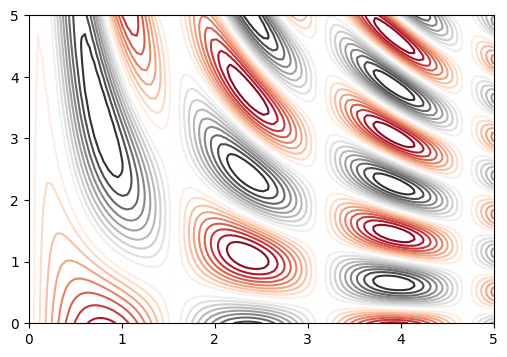

In [10]:
# Sample Code

import matplotlib.pyplot as plt
import numpy as np

def func(x_1, x_2):
    # f(x_1,x_2) = cos(10 + x_1 * x_2)* sin(x_1) 
    return np.cos(10 + x_1 * x_2) * np.sin(2*x_1)

def contour(f:callable):
    fig, ax  = plt.subplots(figsize=(6, 4),dpi=100)
    x = np.linspace(0, 5, 100)
    y = np.linspace(0, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    plt.contour(X, Y, Z, 20, cmap='RdGy')


contour(func)


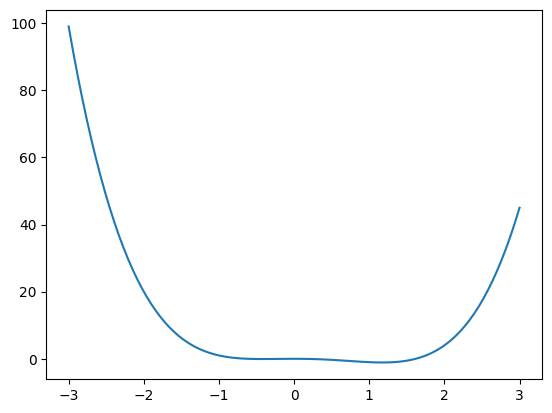

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return x**4 - x**3 - x**2

x = np.linspace(-3, 3, 100)
y = f1(x)

plt.plot(x, y)
plt.show()

---

**Question 2.**<br></br> 

Consider Example 2.1 in [Kochenderfer and Wheeler (2019)](#Kochenderfer-and-Wheeler-2019) and perform the following steps.

1.  
    Use the [```SymPy```](https://www.sympy.org/en/index.html) package already considered in the in-class Python template to derive the derivative of the function $f(x) = -(16x^2-24x+5)e^{-x}$. Then, compute the derivative of $f$ at $\hat{x} = 2.8$ and report it.<br></br>

2.
    Read the Autograd tutorial [```here```](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md). Then use it in Python to compute the derivative of function $f$ at $\hat{x} = 2.8$. ```Sympy``` was used in the class lectures. See associated Python templates. We will use ```AutoGrad``` later within ```PyTorch```, so it is useful to get familiar with it now.<br></br>

In [8]:
# Sample Code

import sympy as sympy
import autograd.numpy as np
from autograd import grad
  
def func(x):
    # Define your function here
    pass

def symbolic_derivative(x_hat):
    # Use sympy to compute the derivative of func above at the point x_hat
    pass

def autograd_derivative(x_hat):
    # Use autograd to compute the derivative of func above at the point x_hat
    pass
    

func(1)
symbolic_derivative(1)
autograd_derivative(1)

---

**Question 3**.<br></br>

In this problem, we will build regression models for home price prediction. Let's begin by loading the data that includes a training set and a test set stored in the files named ```home_price_clean_train.csv```  and ```home_price_clean_test.csv```, respectively. Please see the file ```home_price_data_description.txt``` for the description of each column in the data set.<br></br>

Denote by $\mathcal{T}:= \{(y_i,x_i):i=1,2,\dots,1022\}$ the training set that contains 1022 data points where $y_i$ is the ```SalePrice``` and $x_i$ is the feature vector for the $i$-th observation. Define the following loss functions as Python functions:
$$\mathrm{OLS}(\beta, \mathcal{T}) :=  \frac{1}{1022}\sum_{i=1}^{1022} (y_i - \beta^\top x_i)^2 $$

1. 
    Use the python code below and write a function that computes $\mathrm{OLS}(\beta, \mathcal{T})$ at every input $\beta$.

2. 
    Use the python code below and write a function that uses ```autograd``` library to compute the gradient of $\mathrm{OLS}(\beta, \mathcal{T})$ at every input $\beta$. Then evaluate the gradient of $\mathrm{OLS}(\beta, \mathcal{T})$ at the point $\hat \beta = (1,1,\dots,1)$. <br></br>

3. 
    Use ordinary least squares linear regression module implemented in [```sklearn.linear_model.LinearRegression```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression) to regress ```SalePrice``` against all other columns in the data set. Report the $R^2$ of your model on both training set $\mathcal{T}$. Please see below for the definition of $R^2$.  


**What is $R^2$?** It is a statistical measure of fit that can be associated with your regression. It is defined as 
    
$$R^2 := 1 - \frac{\text{Unexplained variance}}{\text{Total variance}}$$

**How to compute $R^2$?** Assume you have minimized a loss function (e.g., OLS in above) and obtained optimal coefficients $\beta^*$. The $R^2$ of your model on an arbitrary dataset $\mathcal{D}:=\{(y^d_i,x^d_i):i=1,2,\dots,N)\}$ (e.g., training set, test set, etc) is defined as follows. The unexplained variance is the sum of the differences between the value of the dependent variable and the prediction, that is, $\sum_{i=1}^{N} \big(y^d_i  \ -\  (\beta^*)^\top x^d_i\big)^2$. The total variance is the sum of the deviations of the dependent variable values from the mean $\bar{y} = \frac{1}{N}\sum_{i=1}^{N} y_i^d$, that is, $\sum_{i=1}^{N} \big(y^d_i \ -\  \bar{y}\big)^2$. Therefore, $R^2$ is defined as follows:
    
$$ R^2:=1-\frac{\sum_{i=1}^{N} \big(y^d_i  \ -\  (\beta^*)^\top x^d_i\big)^2}{\sum_{i=1}^{N} \big(y^d_i \ -\  \bar{y}\big)^2}.$$


In [9]:
# Sample Code

import numpy as np
import pandas as pd

def OLS(beta,train_X,train_y):
  """
    Description
    ‾‾‾‾‾‾‾‾‾‾‾    
    This function returns the value of the OLS objective function for a given weight vector beta and a train dataset specified by train_y and train_X.
  """
  pass

def OLS_gradient(beta,train_X,train_y):
  """
    Description
    ‾‾‾‾‾‾‾‾‾‾‾    
    This function returns the gradient of the OLS objective function with respect to \beta, given a train dataset specified by train_y and train_X. 
  """
  pass


if __name__== "__main__":

  """
    Load data
  """
  train = pd.read_csv('home_price_data/home_price_clean_train.csv')
  test  = pd.read_csv('home_price_data/home_price_clean_test.csv')
  y     = train['SalePrice']
  X     = train
  del X['SalePrice'] 
  

---

**Question 4 (only for graduate students).**<br></br> 


Consider the following functions:


$$f_3(x) := \frac{1}{2}x^{2}\sin\left(2x\right) , \ x\in [-3,3]$$
$$f_4(x) := x_1+x_2-x_1^{\alpha}x_2^{1-\alpha}, \ \ x=(x_1,x_2)\in [0,\infty)^2, \alpha\in(0,1).$$


Similar to Question 1, answer below questions:


1. 
    Plot the 1D function $f_3$ using the [```matplotlib```](https://matplotlib.org/stable/plot_types/index.html) library in Python. Next, construct [contour](https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html#contour-demo) plot of the 2D function $f_4$ for multiple choices of $\alpha$, e.g., $\alpha=0.2, \alpha=0.5, \alpha=0.8$. <br></br>
    
2. 
    Verify if $f_3$  and $f_4$ are convex or not. One way to prove that a function $f$ is convex is to show that for *every* $x^1$ and $x^2$ in the domain of the function and *every* $\beta\in[0,1]$ it holds that
    $$f(\beta x^1 + (1-\beta)x^2)\le \beta f(x^1) + (1-\beta) f(x^2).$$ 
    To show that $f$ is *not* convex, it suffices to find two points $\hat x^1$ and $\hat x^2$ in the domain of the function as well as a constant $\hat \beta\in[0,1]$ such that the inequality
    $$f(\hat\beta \hat x^1 + (1-\hat \beta)\hat x^2) >  \hat \beta f(\hat x^1) + (1-\hat \beta) f(\hat x^2),$$
    holds. Note that if $f$ is 1D, then $x^1, x^2, \hat x^1,$ and $\hat x^2$ in above expressions are numbers, but if $f$ is 2D, then these are 2D vectors. <br></br>


---

**Question 5 (only for graduate students).**<br></br> 

In this question, you will learn how to apply golden section search (GSS; see Sections 3.3 and 3.4 of [Kochenderfer and Wheeler (2019)](#Kochenderfer-and-Wheeler-2019)) for minimizing a univariate function $f(x):[a,b]\mapsto\mathbb{R}$. Recall functions $f_1$ from Question 1 and $f_3$ from Question 4. Find the minimum of $f_1$ and $f_2$ using GSS starting from the initial bracket $[a,b]=[-3,3]$. Perform four iterations of the search and report the solution after each iteration. Specifically, create a table that shows the bracket computed from GSS at each iteration for both functions. 

---
**References**


* <a id='Kochenderfer-and-Wheeler-2019'> Kochenderfer, Mykel J., and Tim A. Wheeler. Algorithms for optimization. Mit Press, 2019.</a>









